# Esports Earnings Leaderboard – Battle Royale

The **Earnings leaderboard** visualization using Python, pandas, and Matplotlib. It filters the games dataset to the *Battle Royale* genre
and plots a horizontal bar chart of total earnings per game (descending order).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

%matplotlib inline

## Load data

This assumes the CSV files `esports_games.csv` and `country_esports.csv` are in the same
directory as this notebook. Adjust the paths if needed.

In [2]:
games_path = 'esports_games.csv'
country_path = 'country_esports.csv'  # not used directly in this viz, but loaded for completeness

games_df = pd.read_csv(games_path)
country_df = pd.read_csv(country_path)

games_df.head()

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,736284.75,522378.17,0.709478,624,341
1,Age of Empires II,1999,Strategy,3898508.73,1361409.22,0.349213,2256,1939
2,Age of Empires III,2005,Strategy,122256.72,44472.60,0.363764,172,179
3,Age of Empires IV,2021,Strategy,1190813.44,439117.93,0.368755,643,423
4,Age of Empires Online,2011,Strategy,11462.98,775.00,0.067609,52,68


## Filter to a single genre – Battle Royale

We match the behavior of the web app by selecting only games where `Genre == 'Battle Royale'`,
dropping any with zero or missing total earnings, and then sorting by `TotalEarnings` descending.

In [3]:
genre = 'Battle Royale'

br_df = (
    games_df
    .loc[games_df['Genre'] == genre, ['Game', 'Genre', 'TotalEarnings']]
    .dropna(subset=['TotalEarnings'])
)

# Ensure numeric
br_df['TotalEarnings'] = pd.to_numeric(br_df['TotalEarnings'], errors='coerce')
br_df = br_df[br_df['TotalEarnings'] > 0]

# Sort to match leaderboard order (largest at top)
br_df = br_df.sort_values('TotalEarnings', ascending=False).reset_index(drop=True)
br_df.head()

,Game,Genre,TotalEarnings
0,Fortnite,Battle Royale,1.910127e+08
1,PLAYERUNKNOWN'S BATTLEGROUNDS Mobile,Battle Royale,8.732295e+07
2,PLAYERUNKNOWN’S BATTLEGROUNDS,Battle Royale,6.420045e+07
3,Apex Legends,Battle Royale,2.615324e+07
4,Free Fire,Battle Royale,1.814199e+07


## Helper: money formatting

We recreate the `$12.3K` / `$45.6M`-style formatting used in the original D3 chart.

In [4]:
def format_money(value: float) -> str:
    """Format a numeric value using K / M suffixes, similar to the React/D3 version."""
    if value >= 1_000_000:
        return f"${value / 1_000_000:.1f}M"
    if value >= 1_000:
        return f"${value / 1_000:.1f}K"
    return f"${value:,.0f}"

# Quick sanity check
[format_money(x) for x in [950, 25_000, 3_400_000]]

['$950', '$25.0K', '$3.4M']

## Plot: Earnings leaderboard (Battle Royale)

We now create a horizontal bar chart that mirrors the original visualization:

- Y-axis: game titles (sorted by total earnings).  
- X-axis: total earnings.  
- Labels to the right of each bar showing the formatted dollar amount.


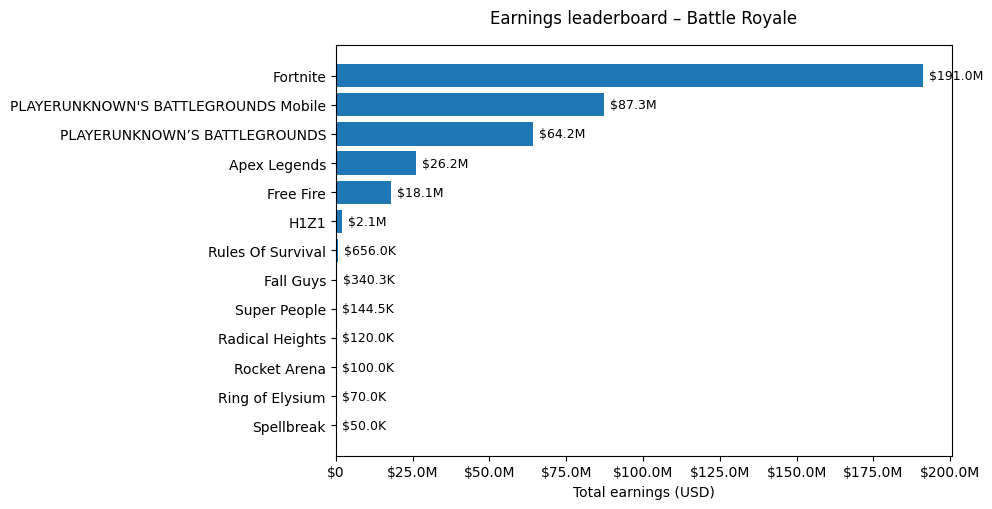

In [5]:
n_games = len(br_df)
fig_height = max(4, 0.4 * n_games)
fig, ax = plt.subplots(figsize=(10, fig_height))

y_pos = np.arange(n_games)
values = br_df['TotalEarnings'].values

bars = ax.barh(y_pos, values)

ax.set_yticks(y_pos)
ax.set_yticklabels(br_df['Game'])
ax.invert_yaxis()

ax.set_title(f'Earnings leaderboard – {genre}', pad=16)
ax.set_xlabel('Total earnings (USD)')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: format_money(x)))

for bar, value in zip(bars, values):
    width = bar.get_width()
    ax.text(
        width + values.max() * 0.01,
        bar.get_y() + bar.get_height() / 2,
        format_money(value),
        va='center',
        ha='left',
        fontsize=9,
    )

plt.tight_layout()
plt.show()